# Application and Tips for Machine Learning
> In this post, it will mentioned about the application and tips which can help to implement Machine Learning model. Also we will cover the overfitting problem and solution with example.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Tensorflow, Machine_Learning]
- image: images/learning_rate.png

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['text.usetex'] = True
plt.rc('font', size=15)

## Learning Rate
We used Gradient Descent method to find the weight making the cost minimum. Usually, at each step in training, element of weight vector updates its value by the direction of gradient decreasing.

$$ \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta) $$

Here, we can see the constant term, $\alpha$, also known as **learning rate**. Learning rate is a hyper-parameter that controls how much we are adjusting the weights with respect to the loss gradient. Simply speaking, it is a speed of finding the answer that we want to find. 

### Good and Bad learning rate

![learning_rate](image/learning_rate.png)

Suppose the there is an optimal point, we want to find it by searching manually. If the speed is too fast, it may pass the optimal point. Then we need to go back and re-search it. Or maybe we can miss it, and keep going. Sometimes it may occur going forward and backward, repeatedly. If the speed it too slow, then it takes a long time to find it.

Actually, there is no answer for optimial learning rate. It may be different on each case and environment, and even if the optimizer may take different learning rate. By andrej karpathy, $3e^4$ is best learning rate for Adam optimzier.

### Annealing the learning rate
So it is good approach of changing the learning rate per each epoch. It is called **annealing (or decaying) the learning rate**. In the example case we mentioned previously, there is the case that model tries to find the optimal point with going forward and backward repeatedly. If we can change the learning rate in that case, it can avoid to struggling in saddle point, and keep trying to find the point.

There are various way to annealing the learning rate:

- Step Decay: Decay the rate per each N epochs.
- Exponential decay: Decay the rate with exponential function ($\alpha = \alpha_0 e^{-kt}$)
- ${1 \over t}$ decay: Decay the rate with fraction ($\alpha = \frac{\alpha_0}{1 + kt}$)

## Data Preprocessing
When we implement the logistic regression model for [finding diabetes](https://goodboychan.github.io/chans_jupyter/python/tensorflow/machine_learning/2020/09/09/03-Logistic-Regression-Classification.html#Logistic-Regression-with-diabetes-classification), we found out that the scale of each column is different from each other. In this dataset, it is hard to train it cause model understand the value itself. That is, sometime model could learn that large number of value is always good for prediction. And there is the case that the mean and variance is different from each columns. At this case, model may mis-understand the data, and interpret the valid data as an outlier.

For this problem, we need to apply method so called **Feature Scaling**. Feature scaling makes the data re-arranging in same standard. There are two common ways for feature scaling:

- **Standardization** : If you take the statistic class, maybe you heard about standard normal distribution. And to make normal distribution to standard normal distribution, we calculate the **Z-score** (also known as Standard Score). Throught this, it makes the standard normal distribution with mean of 0 and standard deviation of 1. Same approach can be applied here. If we get dataset, and calculate the Z-score, we can make dataset to standard distribution. So here is how to calculate Z-score,

$$ x_{new} = \frac{x - \mu}{\sigma} $$

- **Normalization** : Unlike Standardization, Normalization makes the dataset to have some finite range. such as 0 and 1. To do this, we consider the maximum value of dataset to be 1, and the minimum value of dataset to be 0. And calculate the ratio between the measured point and minimum value. So it is also called **Min-Max Scaling**.

$$ x_{new} = \frac{x - x_{min}}{x_{max} - x_{min}} $$


## Overfitting
Usually, the learning process with updating weight and bias is called **fit**. So training is also called **fit the model**. So what does it mean of **overfitting**?

If we train the model with given data, we can see that the model is well-trained by monitoring the cost or loss on each epochs. The problem is that what if we input the unknown data to the trained model. Does it work? Actually, we don't know any information about unknown data, the mean, standard deviation, etc. Maybe it contains lots of outliers the model doesn't see while training. 

As a result, well-performed model must work well on not only training data, but also the unknown data. And that's why we separate the training dataset and test dataset in the data preprocessing step.

![overfit_underfit](image/overfit_underfit.png)

Overfitting and underfitting is the problem we explained about. Overfitting is the situation that model works well on training dataset, but worst performance on test dataset. Usually, someone mentioned about **high variance**. In statistical view, high variance means that the model (or estimator) varies a lot depending on the data you get. And it occurs while the model has various of dependent variable.

Underfitting is the situation that model doesn't work well on training dataset. It has **high bias** since the model doesn't have ability to handle the difference of dataset, and underfitting model have low number of dependent variables.

So, to avoid the overfitting or underfitting, we need to control the number of dependent variables. Actually, the most effective way to handle both is to get more training data containing variety. But you know that it takes too much cost, and the amount of dataset is not infinite. Second approach is to apply Principle Component Analysis (PCA for short). PCA is one of unsupervised learning method for dimensionality reduction. Through this, we can reduce the number of features (of course, PCA selects the component which mainly affect the data distribution.) for handling high variance. If we suffered from underfitting, then we can add another features.

Another way is to add regularization term for loss. Consider about the hypothesis and cost function for linear regression.

$$ H_{\theta}(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \dots \\
 J(\theta) = {1 \over 2m} \sum_{i=1}^m (H_{\theta}(x_i) - y_i)^2 $$

We can the additional term for express the weight vector information to the cost function. So it modifies like this,

$$ J(\theta) = {1 \over 2m} \sum_{i=1}^m (H_{\theta}(x_i) - y_i)^2 + {\lambda \over 2m} \sum_{j=1}^m \theta_j^2 $$

Upper case is the example of L2 loss (squared error) with L2 regularization. If you want to use L1 loss (absolute error) with L1 regularization, you can express like this.

$$ J(\theta) = {1 \over m} \sum_{i=1}^m \vert H_{\theta}(x_i) - y_i \vert + {\lambda \over m} \sum_{j=1}^m \vert \theta_j \vert $$

It's up to you what you choose for lost function and regularization term.

There is another way like data augmentation, dropout, and so on. Again, there is no optimal way to handle overfitting and underfitting. You need to try it with some feature, and tune the model based on error.

## Application and tips with Tensorflow

### Data Preprocess
Let's see the example about Data preprocessing, especially on normalization. We have some dataset containing outliers

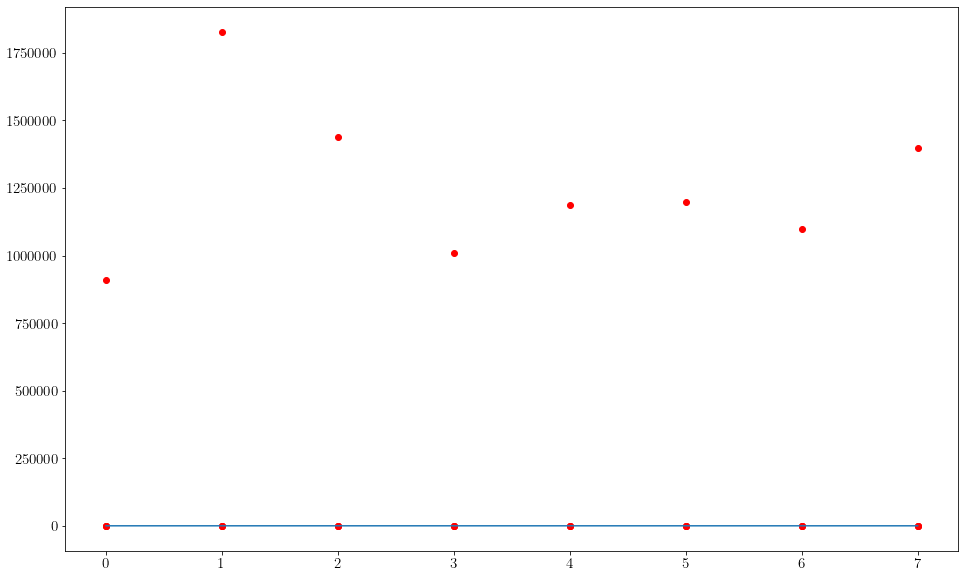

In [2]:
data = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_train = data[:, :-1]
y_train = data[:, [-1]]

plt.plot(x_train, 'ro')
plt.plot(y_train)
plt.show()

As you can see, most of data are distributed near 800, but some data value is over 1000000. To handle this, we can apply normalization.

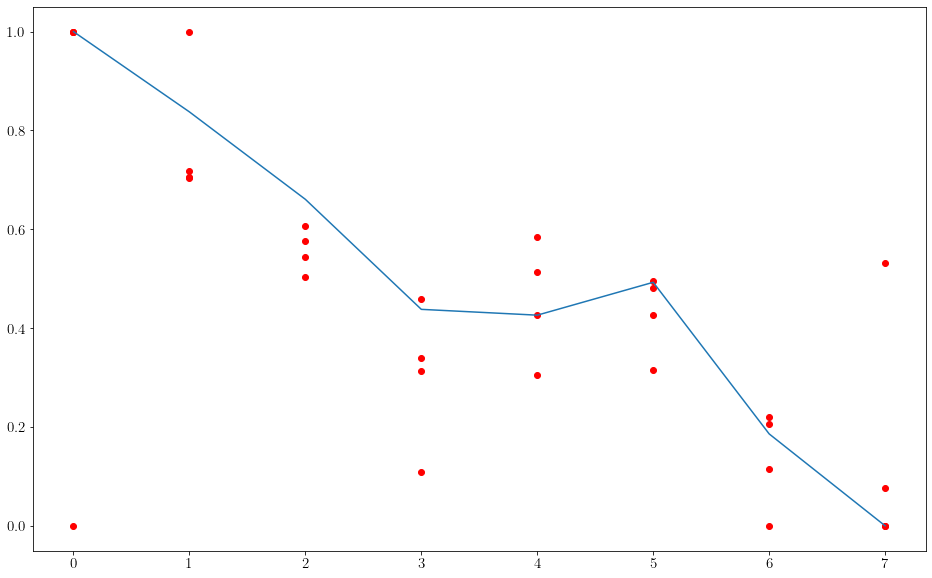

In [3]:
# Apply normalization
def normalize(data):
    return (data - np.min(data, 0)) / (np.max(data, 0) - np.min(data, 0))

data_normalized = normalize(data)

x_train = data_normalized[:, :-1]
y_train = data_normalized[:, -1]

plt.plot(x_train, 'ro')
plt.plot(y_train)
plt.show()

### Regularization term
Now we will build linear regression model. But it will be helpful to add regularization term in cost function to avoid overfitting.


In [16]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

# Initialize Weight and bias
W = tf.Variable(tf.random.normal([x_train.shape[1], 1]), dtype=tf.float32)
b = tf.Variable(tf.random.normal([1]), dtype=tf.float32)

variables = [W, b]

We can define the hypothesis of linear regression and regularization term.

$$ J(\theta) = {1 \over 2m} \sum_{i=1}^m (H_{\theta}(x_i) - y_i)^2 + {\lambda \over 2m} \sum_{j=1}^m \theta_j^2 $$

In [17]:
# hypothesis for linear regression
def hypothesis(X):
    return tf.matmul(X, W) + b

# cost with regularizer
def cost_with_regularizer(loss, beta=0.01):
    W_reg = tf.nn.l2_loss(W)
    return tf.reduce_mean(loss + beta * W_reg)

# Loss function
def loss_fn(h, y, flag=False):
    cost = tf.reduce_mean(tf.square(h - y))
    if flag:
        cost = cost_with_regularizer(cost)
    return cost

### Learning rate Decay
We can also implement the learning rate decaying. In this example, we will apply exponential decaying from tensorflow.

In [18]:
start_lr = 0.1

# Learning rate with exponential decay
learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=start_lr,
                                                               decay_steps=50,
                                                               decay_rate=0.99,
                                                               staircase=True
                                                              )
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

### Training process
Then we can build the gradient function, and finalize the training process

In [19]:
def grad(X, y, flag):
    with tf.GradientTape() as tape:
        loss = loss_fn(hypothesis(X), y, flag)
    return tape.gradient(loss, variables), loss

In [20]:
for e in range(500):
    for X, y in dataset:
        X = tf.cast(X, tf.float32)
        y = tf.cast(y, tf.float32)
        grads, loss = grad(X, y, True)
        optimizer.apply_gradients(grads_and_vars=zip(grads, variables))
    if e % 50 == 0:
        print('epoch: {}, loss: {:.4f}'.format(e, loss))

epoch: 0, loss: 0.8063
epoch: 50, loss: 0.1472
epoch: 100, loss: 0.1113
epoch: 150, loss: 0.1031
epoch: 200, loss: 0.1005
epoch: 250, loss: 0.0993
epoch: 300, loss: 0.0985
epoch: 350, loss: 0.0978
epoch: 400, loss: 0.0972
epoch: 450, loss: 0.0968


## Summary
We covered the some application and tips for regression model. Especially, we talked about learning rate, and data preprocessing. And also to avoid overfitting problem, we can apply regularization term. And through the example, (and thanks to tensorflow) we can implement it easily.